In [22]:
import numpy as np
import nibabel as nib
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
from sys import getsizeof
from nilearn import plotting
import math

In [3]:
a = pd.read_csv("example_data.csv")  # path to your input csv
whole_rois = list(a.columns[2:260])

145
(7221032,)
(7221032,)


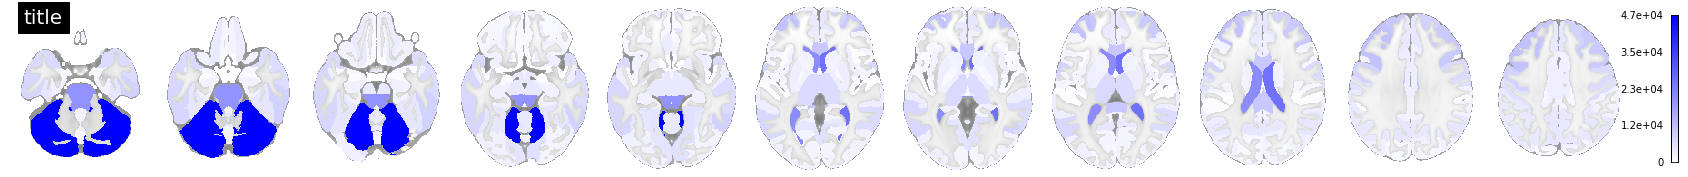

In [25]:
def get_level(level):
    roi_level = level
    c = pd.read_csv('MUSE_levels.csv')  
    selected = c[c['ROI_level']==roi_level] # select ROI at the correct level
    rois = list(selected['ROI_ID'])
    return rois

level = 0
rois = get_level(level)
print(len(rois))

##### rois for only Gray Matter
rois_WM = [40,41,81,82,83,84,85,86,87,88]
rois = [ elem for elem in rois if elem not in rois_WM]
rois_str = [str(x) for x in rois]

#### templat to plot on
template = nib.load("MNI152_T1_1mm_brain_LPS_filled.nii")

p = nib.load('MUSE_level_' + str(level) + '.nii.gz')
template_flat = p.get_fdata().flatten()
print(template_flat.shape)
aff = nib.load('MUSE_level_' + str(level) + '.nii.gz').affine
template_empty = np.zeros(template_flat.shape)
print(template_empty.shape)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(30, 3))

for i in rois:
    ind = np.where(template_flat == i)
    template_empty[ind] = a[str(i)]

q = template_empty.reshape(182, 218,182)
q = nib.Nifti1Image(q, affine=aff)

cut_coords = [-30,-25,-20, -15,-10, 5,0,10,20, 30,40]

display = plotting.plot_stat_map(q, display_mode='z',cmap = "bwr_r",annotate=False, 
                                 axes=ax1,    # plot on ax1
#                                  vmax = 2.5,  # control max value
                                 bg_img = template,black_bg=False,
                                 cut_coords=cut_coords, draw_cross = False, alpha=1)
display.title("title" , size=20) # size can change tile fontsize